# Toolkit

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns 

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

from pyclustering.cluster.clique import clique, clique_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES

# Data

In [ ]:
data = read_sample(FCPS_SAMPLES.SAMPLE_TARGET)

data = np.array(data)

# `CLIQUE`

In [70]:
# create CLIQUE algorithm for processing
intervals = 10  # defines amount of cells in grid in each dimension
threshold = 0   # lets consider each point as non-outlier
clique_instance = clique(data, intervals, threshold)

# start clustering process and obtain results
clique_instance.process()

clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()        # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()        # CLIQUE blocks that forms grid

print("Clusters: ", clusters)
print("Noise: "   , noise)
print("Cells: "   , cells)

Clusters:  [[0, 399, 766], [2, 401, 768], [481, 466, 502, 503, 530, 587, 630, 691, 418, 464, 507, 524, 529, 541, 561, 569, 584, 588, 626, 655, 675, 729, 741, 744, 746, 754, 437, 508, 593, 611, 662, 709, 405, 433, 447, 475, 494, 505, 511, 514, 516, 545, 618, 624, 627, 671, 684, 687, 698, 403, 407, 558, 679, 439, 583, 735, 463, 427, 432, 454, 559, 572, 610, 690, 716, 745, 409, 413, 442, 462, 506, 513, 520, 522, 552, 574, 576, 577, 592, 604, 621, 656, 661, 663, 669, 706, 711, 739, 749, 765, 406, 448, 465, 468, 495, 525, 527, 532, 536, 579, 590, 597, 625, 628, 654, 674, 710, 731, 733, 411, 420, 470, 517, 533, 555, 645, 681, 712, 719, 740, 414, 518, 564, 726, 491, 504, 600, 445, 615, 758, 408, 415, 428, 440, 443, 578, 648, 657, 696, 724, 728, 734, 410, 436, 449, 542, 549, 562, 571, 585, 596, 602, 659, 676, 680, 695, 722, 737, 751, 483, 580, 652, 673, 683, 700, 720, 419, 423, 426, 435, 438, 458, 480, 482, 540, 551, 565, 567, 609, 613, 623, 631, 637, 677, 717, 721, 750, 753, 761, 764, 484, 41

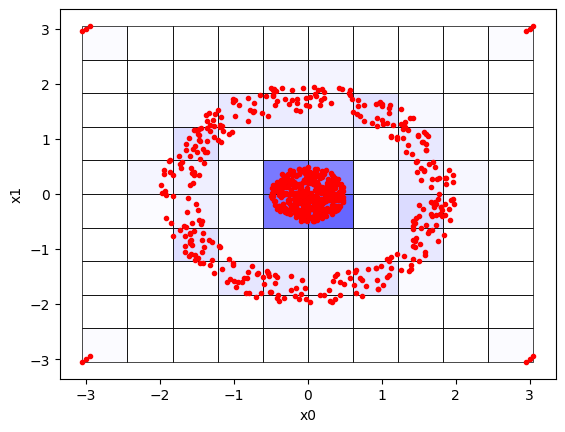

In [71]:
# show grid that has been formed by the algorithm
clique_visualizer.show_grid(cells, data)                

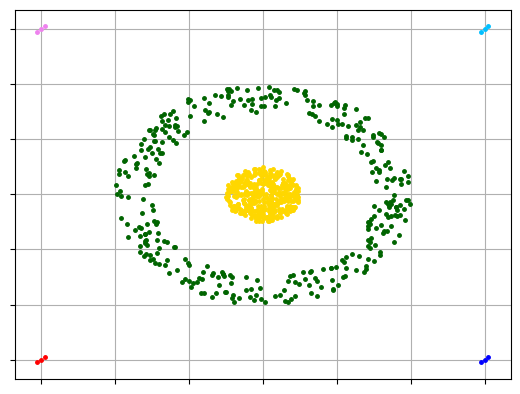

In [72]:
# show clustering results
clique_visualizer.show_clusters(data, clusters, noise)  

# `DBSCAN`

In [73]:
db = DBSCAN(eps=0.3, min_samples=5)
db.fit(data)

DBSCAN(eps=0.3)

<Axes: >

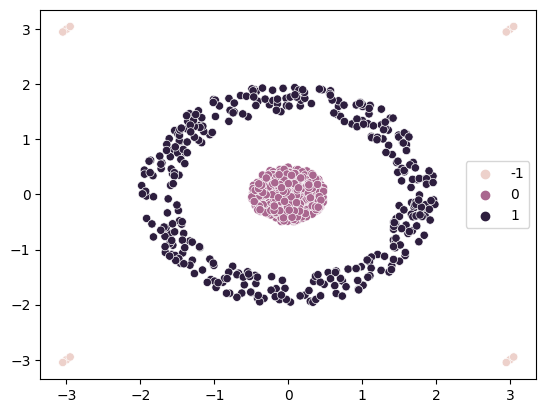

In [74]:
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=db.labels_)

In [77]:
KM_model = KMeans(n_clusters=3)
Ag_model = AgglomerativeClustering(n_clusters=3)
KM_model.fit(data)
Ag_model.fit(data)

C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AgglomerativeClustering(n_clusters=3)

<Axes: >

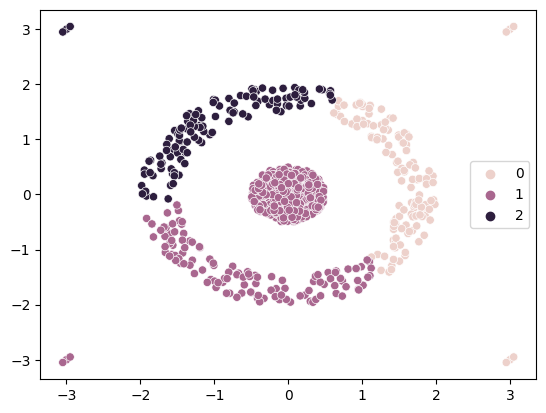

In [78]:
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=KM_model.labels_)

<Axes: >

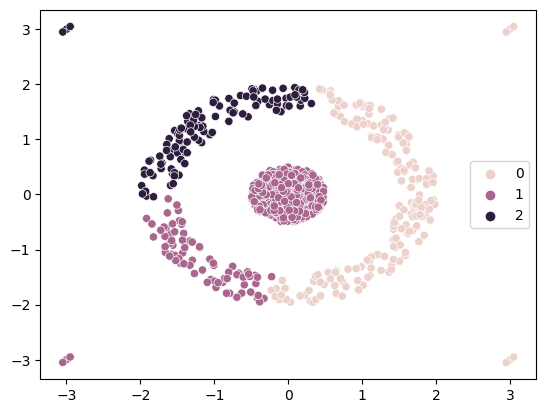

In [79]:
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=Ag_model.labels_)